
# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.

> Question are sapertated into 2 parts:

>Part one:  The numeric features that help movie to success?

>Part two:  The categorical features that help movie to success?

### So Let's START



In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report, I will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.

### General Properties

In [3]:
# Load your data and print out a few lines.
# ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
# Should we separate them? It doesn't have a meaning if we split to rows
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### check the shape of the dataframe

In [4]:

df.shape

(10866, 21)

#####  Check info of the dataframe; # rows, columns, data types, missing values.

##### See if there are columns are not useful in the data analysis, like imdb_id, overview and release_date as we already have the release_year and we wouldn't use id, imdb_id and overview in our analysis.
 
##### There is alot of missing values in cast, homepage, director, tagline, keywords and production_companies so we can remove them later in cleaning.
 
##### I think data types are suitable, so we don't need to change them.

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

##### Check if there are duplicated rows, There is only one duplicate we will drop it later.


In [6]:
sum(df.duplicated())

1

##### Check number of null values for each column (Missing Values).
##### There are over 1000 missing values for homepage, tagline, keywords, and production_companies, so we would drop them later and 
##### check of the others are still missing or not.

In [7]:

df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

##### Check describe
##### There are zero values of budget, revenue, and runtime whish is doesn't make sence for the min value, so we need to remove it


In [8]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


## Data Cleaning 

> drop unnecessary columns, drop duplicates, drop null values, make cleaning descisions on 0 values

##### After discussing the structure of the data and any problems that need to be
##### cleaned, perform those cleaning steps in the second part of this section.
##### First, we will drop the unwanted columns that we mentioned above


In [9]:

df.drop(columns=[ 'imdb_id' , 'overview', 'homepage', 'tagline', 'keywords',  'production_companies', 'release_date'], inplace=True)


In [10]:
# Check columns
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
# Drop null values
df.dropna(inplace=True)

In [12]:
# Check if there are more missing values
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

In [13]:
# Drop dublicates
df.drop_duplicates(inplace=True)

In [14]:
# Check douplicates
sum(df.duplicated())

0

In [15]:
# check number of rows have zero values of budget, revenue, and runtime
len(df.query('budget == 0'))

5578

In [16]:
len(df.query('revenue == 0'))

5888

In [17]:
len(df.query('runtime == 0'))

28

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
 12  budget_adj      10731 non-null  float64
 13  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


##### so we can't drop them as they are large number for our total samples ( we can't lose the half of them).
##### we can change it from 0 to null so that the min wouldn't be affected.

In [19]:

df['budget'] = df['budget'].replace(0,None)
df['revenue'] = df['revenue'].replace(0,None)
df['runtime'] = df['runtime'].replace(0,None)

In [20]:
# check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10731 non-null  int64  
 1   popularity      10731 non-null  float64
 2   budget          10731 non-null  int64  
 3   revenue         10731 non-null  int64  
 4   original_title  10731 non-null  object 
 5   cast            10731 non-null  object 
 6   director        10731 non-null  object 
 7   runtime         10731 non-null  int64  
 8   genres          10731 non-null  object 
 9   vote_count      10731 non-null  int64  
 10  vote_average    10731 non-null  float64
 11  release_year    10731 non-null  int64  
 12  budget_adj      10731 non-null  float64
 13  revenue_adj     10731 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 1.2+ MB


In [21]:
len(df.query('budget == 0'))

0

In [22]:
# Now min values for budget, revenue, and runtime make sence
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,65201.741869,0.652615,2.185832e+07,5.359340e+07,102.708974,219.812972,5.964710,2001.259622,1.776530e+07,5.200623e+07
std,91470.508056,1.004804,3.167040e+07,1.203666e+08,30.059807,578.815324,0.930283,12.820151,3.446630e+07,1.454252e+08
min,5.000000,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10547.500000,0.210765,3.300000e+06,2.000000e+06,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20323.000000,0.387081,1.050000e+07,1.456025e+07,99.000000,39.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,73948.500000,0.720889,2.600000e+07,4.848732e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,3.470546e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
## Exploratory Data Analysis

> Statistics and Create visualizations to answer questions

## Research Question 1: What are the numeric features that help movie to success? 
### Describe features 

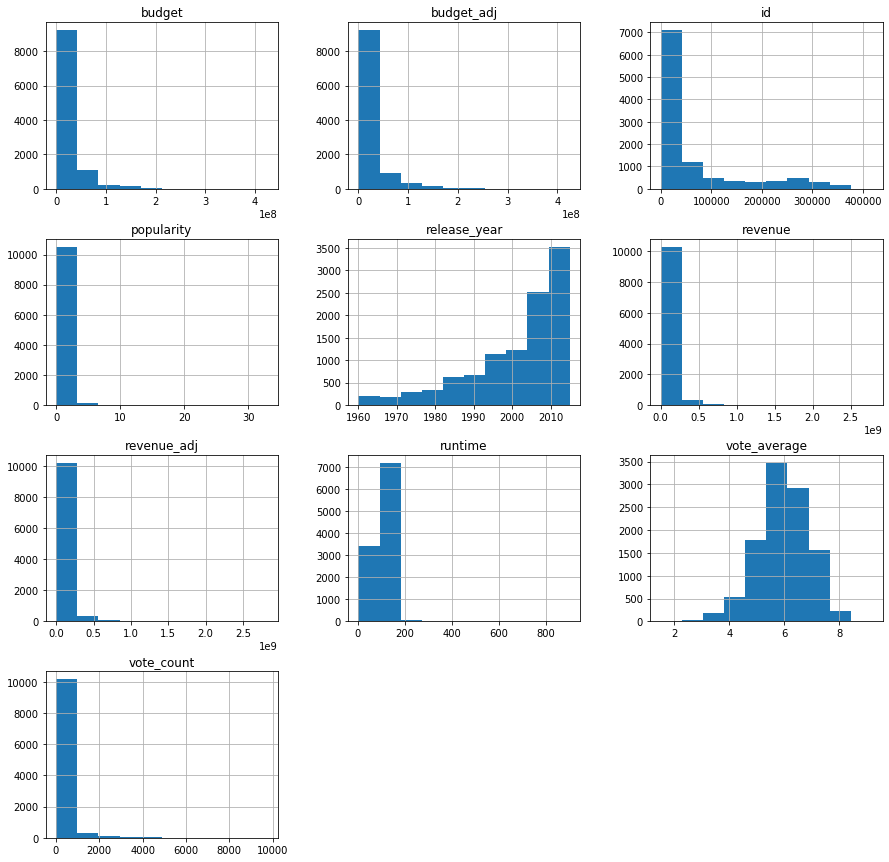

In [23]:
df.hist(figsize=(15,15));


#### all of the features budget, popularity, revenue and vote_count are skew to the right
### so How they affect each other?

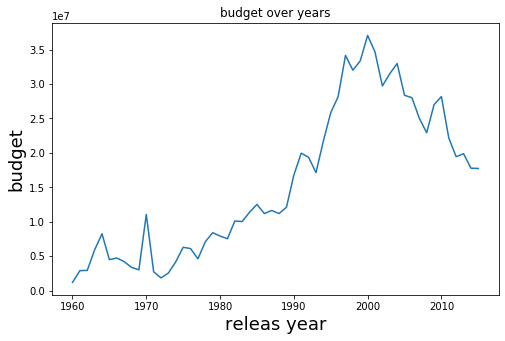

In [28]:
# budget over years
year_budget=df.groupby('release_year')['budget'].mean()

plt.subplots(figsize=(8, 5))
plt.title('budget over years')
plt.xlabel('releas year',fontsize=18)
plt.ylabel('budget',fontsize=18);
plt.plot(year_budget);

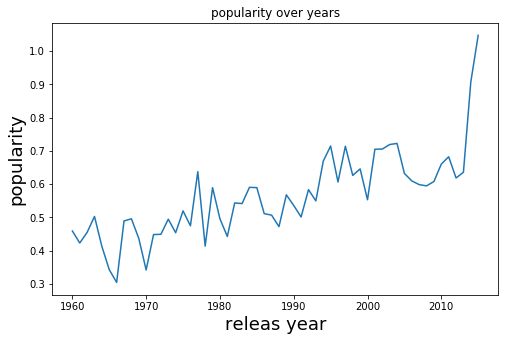

In [39]:
# popularity over years
year_popularity=df.groupby('release_year')['popularity'].mean()

plt.subplots(figsize=(8, 5))
plt.title('popularity over years')
plt.xlabel('releas year',fontsize=18)
plt.ylabel('popularity',fontsize=18);
plt.plot(year_popularity);

In [38]:
df['budget'].value_counts()

10000000     418
20000000     382
15000000     382
5000000      359
3000000      318
            ... 
945000         1
12300000       1
12250000       1
123000000      1
1880006        1
Name: budget, Length: 552, dtype: int64

In [43]:
df['popularity'].value_counts()

0.223151    2
0.255458    2
0.060425    2
0.430191    2
0.557155    2
           ..
0.155075    1
0.596755    1
0.618078    1
0.223994    1
0.234375    1
Name: popularity, Length: 10684, dtype: int64

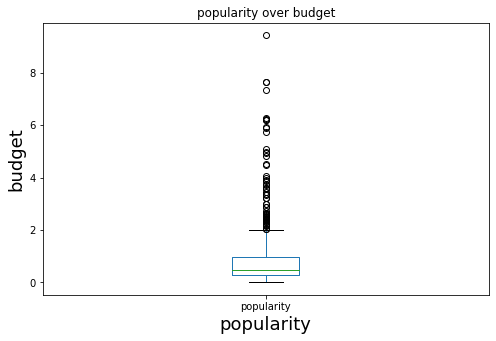

In [45]:
# popularity over years
budget_popularity=df.groupby('budget')['popularity'].mean()

plt.subplots(figsize=(8, 5))
plt.title('popularity over budget')
plt.xlabel('popularity',fontsize=18)
plt.ylabel('budget',fontsize=18);
budget_popularity.plot(kind='box');

It tends to that we can't do budget and popularity directly, so we would create another column to classify budget

In [57]:
min_value=df['budget'].min()
first_quantile=df['budget'].quantile(0.25)
second_quantile=df['budget'].quantile(0.5)
third_quantile=df['budget'].quantile(0.75)
max_value=df['budget'].max()
conditions = [
    (df['budget'] > min_value) & (df['budget'] <= first_quantile),
    (df['budget'] > first_quantile) & (df['budget'] <= second_quantile),
    (df['budget'] > second_quantile) & (df['budget'] <= third_quantile),
    (df['budget'] > third_quantile) & (df['budget'] <= max_value)
    ]
values = ['low', 'low-mid','mid-high', 'high']
df['budget_class'] = np.select(conditions, values)


In [58]:
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_class
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08,high
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08,high
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09,high
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09,high


In [69]:
df['budget_class'].value_counts()

mid-high    2706
low-mid     2683
high        2657
low         2653
0             32
Name: budget_class, dtype: int64

In [76]:
df.drop(df[df['budget_class'] == '0'].index,inplace=True)

In [77]:
df['budget_class'].value_counts()

mid-high    2706
low-mid     2683
high        2657
low         2653
Name: budget_class, dtype: int64

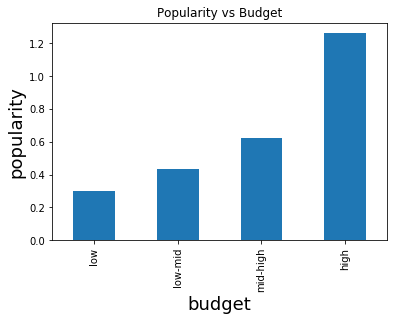

In [101]:
budget_pop=df.groupby('budget_class')['popularity'].mean().sort_index()
order = ['low', 'low-mid', 'mid-high', 'high']
budget_pop = budget_pop.loc[order]
budget_pop.plot(kind='bar');
plt.xlabel('budget',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Popularity vs Budget');


### So the more budget the more popularity

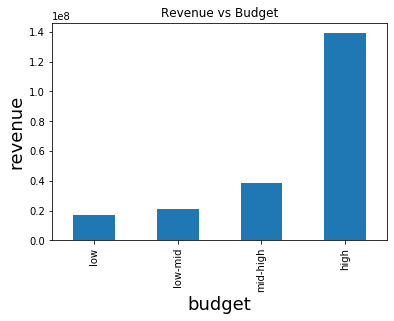

In [103]:
# revenue vs buget
budget_revenue=df.groupby('budget_class')['revenue'].mean().sort_index()
# p =[budget_pop[1],budget_pop[2],budget_pop[3],budget_pop[0]]
# print(p, type(p))
order = ['low', 'low-mid', 'mid-high', 'high']
budget_revenue = budget_revenue.loc[order]
budget_revenue.plot(kind='bar');
plt.xlabel('budget',fontsize=18)
plt.ylabel('revenue',fontsize=18)
plt.title('Revenue vs Budget');


### So the more budget the more revenue

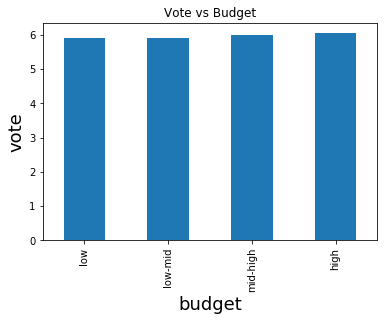

In [150]:
budget_vote=df.groupby('budget_class')['vote_average'].mean().sort_index()
order = ['low', 'low-mid', 'mid-high', 'high']
budget_vote = budget_vote.loc[order]
budget_vote.plot(kind='bar');
plt.xlabel('budget',fontsize=18)
plt.ylabel('vote',fontsize=18)
plt.title('Vote vs Budget');

#### So budget doesn't affect vote 

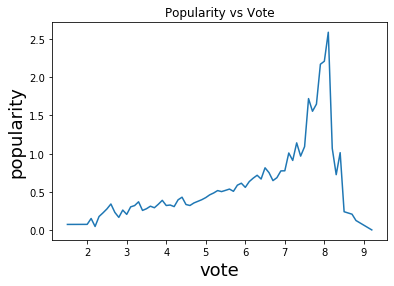

In [159]:
vote_pop=df.groupby('vote_average')['popularity'].mean().sort_index()
vote_pop.plot()
plt.xlabel('vote',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Popularity vs Vote');

#### The more popularity the more votes
## Research Question 2: What are the categorical features that help movie to success? 
### What is the most gender in the dataset?

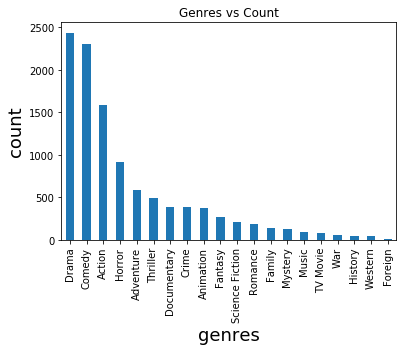

In [162]:
df['genres']=df['genres'].str.split("|",expand=True)
movie_genres = df['genres'].value_counts()
movie_genres.plot(kind='bar')
plt.xlabel('genres',fontsize=18)
plt.ylabel('count',fontsize=18)
plt.title('Genres vs Count');

#### Drama gender is the most gender count in the dataset
### Let's See which gender make more profit?

In [161]:
def diffColumns(a,b):
    return a-b
df['profit']=diffColumns(df['revenue'],df['budget'])
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_class,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,Action,5562,6.5,2015,1.379999e+08,1.392446e+09,high,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy,George Miller,120,Action,6185,7.1,2015,1.379999e+08,3.481613e+08,high,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley,Robert Schwentke,119,Adventure,2480,6.3,2015,1.012000e+08,2.716190e+08,high,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford,J.J. Abrams,136,Action,5292,7.5,2015,1.839999e+08,1.902723e+09,high,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel,James Wan,137,Action,2947,7.3,2015,1.747999e+08,1.385749e+09,high,1316249360


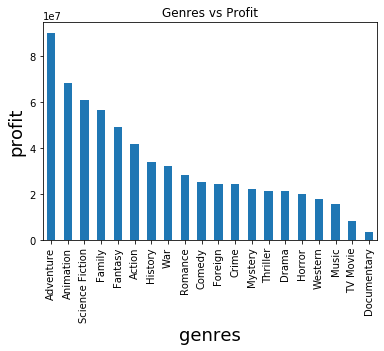

In [163]:
# geners vs profit
geners_profit=df.groupby('genres')['profit'].mean().sort_values(ascending=False)
geners_profit.plot(kind='bar');
plt.xlabel('genres',fontsize=18)
plt.ylabel('profit',fontsize=18)
plt.title('Genres vs Profit');

#### So the Adventure gender is the most gender that make profit
### Let's see How the budget and runtime affect the top 3 genders?

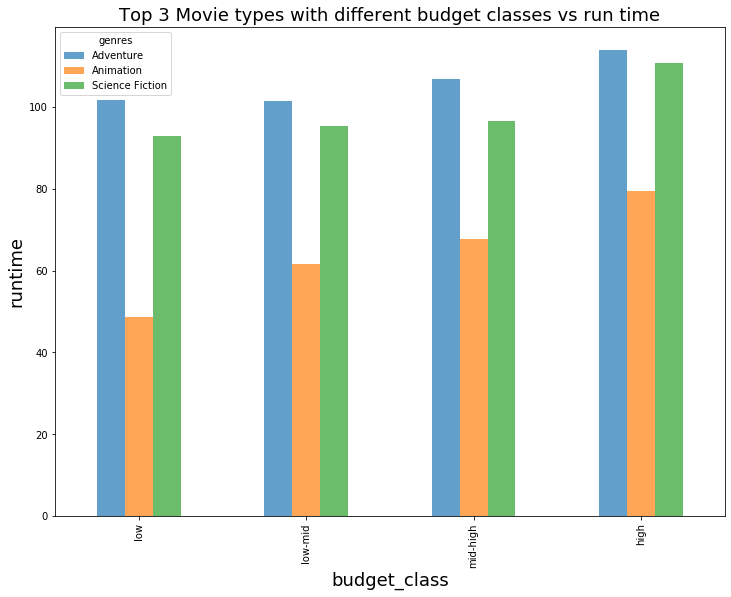

In [129]:
top_genders=geners_profit[:3].index
# print(top_genders)
types_budget_runtime = df.query('genres in @ top_genders').groupby(['budget_class','genres'])['runtime'].mean().unstack(fill_value=0)
order = ['low', 'low-mid', 'mid-high', 'high']
types_budget_runtime = types_budget_runtime.loc[order]
types_budget_runtime.plot(kind='bar',alpha=0.7,figsize=(12,9));
plt.xlabel('budget_class',fontsize=18)
plt.ylabel('runtime',fontsize=18)
plt.title('Top 3 Movie types with different budget classes vs run time',fontsize=18);



#### so the more budget the more runtime as expicted and adventure gender has the most runtime value
### What about the Vote average?

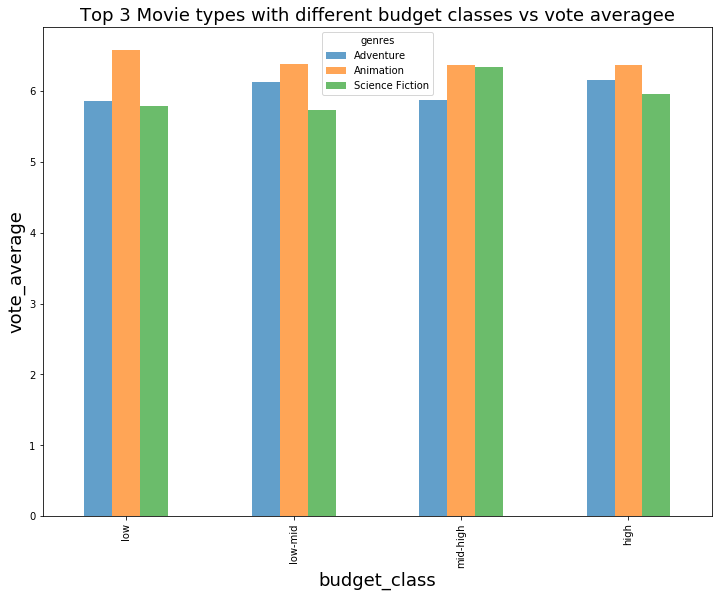

In [130]:
types_budget_vote_average = df.query('genres in @ top_genders').groupby(['budget_class','genres'])['vote_average'].mean().unstack(fill_value=0)
order = ['low', 'low-mid', 'mid-high', 'high']
types_budget_vote_average = types_budget_vote_average.loc[order]
types_budget_vote_average.plot(kind='bar',alpha=0.7,figsize=(12,9));
plt.xlabel('budget_class',fontsize=18)
plt.ylabel('vote_average',fontsize=18)
plt.title('Top 3 Movie types with different budget classes vs vote averagee',fontsize=18);


#### It shows that the Animation gender has the most vote value in all the 4 classes especially the low budget class 
### Let's see the most popular cast and their movies have more votes

In [160]:
# Top 10 cast count 
df['cast']=df['cast'].str.split("|",expand=True)
top_cast = df['cast'].value_counts()[:10].index
df['cast'].value_counts()

Nicolas Cage                50
Robert De Niro              42
Bruce Willis                39
Clint Eastwood              38
Tom Hanks                   37
                            ..
Alexis DÃ­az de Villegas     1
Jane Levy                    1
Matthew Mercer               1
Zawe Ashton                  1
Alex Russell                 1
Name: cast, Length: 4265, dtype: int64

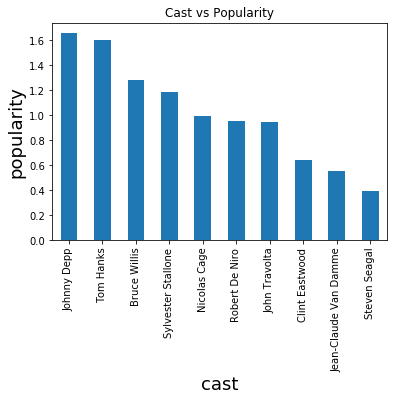

In [164]:
# cast vs popularity
cast_pop=df.query('cast in @ top_cast').groupby(['cast'])['popularity'].mean().sort_values(ascending=False)
cast_pop.plot(kind='bar');
plt.xlabel('cast',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Cast vs Popularity');

#### It shows that Johnny Depp has the most popular movies
### What about the votes?

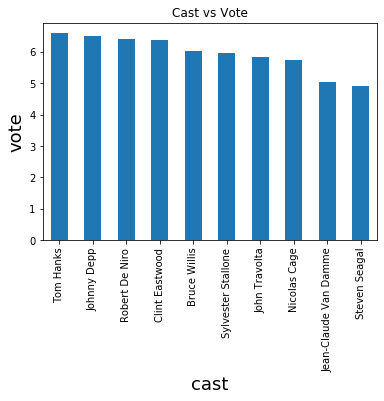

In [165]:
# cast vs vote_average
cast_vote=df.query('cast in @ top_cast').groupby(['cast'])['vote_average'].mean().sort_values(ascending=False)
cast_vote.plot(kind='bar');
plt.xlabel('cast',fontsize=18)
plt.ylabel('vote',fontsize=18)
plt.title('Cast vs Vote');

#### It shows that Tom Hanks has the most voted movies
### Let's see the most popular director and their movies have more votes

In [146]:
# Top 10 directors count
top_directors = df['director'].value_counts()[:10].index
top_directors

Index(['Woody Allen', 'Clint Eastwood', 'Steven Spielberg', 'Martin Scorsese',
       'Ridley Scott', 'Steven Soderbergh', 'Ron Howard', 'Joel Schumacher',
       'Brian De Palma', 'Wes Craven'],
      dtype='object')

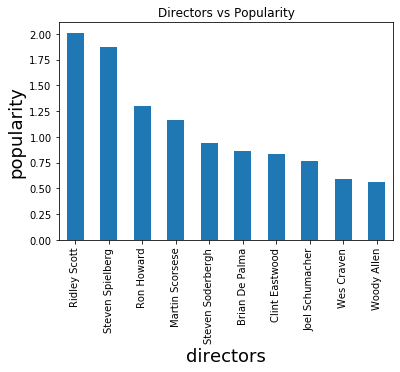

In [167]:
# directors vs popularity
directors_pop=df.query('director in @ top_directors').groupby(['director'])['popularity'].mean().sort_values(ascending=False)
directors_pop.plot(kind='bar');
plt.xlabel('directors',fontsize=18)
plt.ylabel('popularity',fontsize=18)
plt.title('Directors vs Popularity');

#### It shows that Ridley Scott has the most popular movies
### What about the votes?

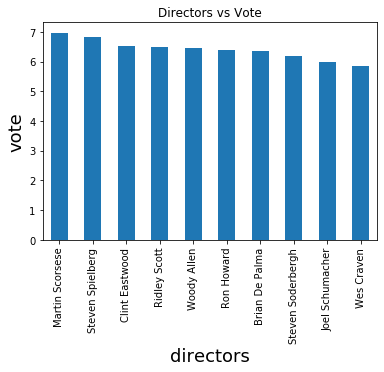

In [166]:
# cast vs vote_average
director_vote=df.query('director in @ top_directors').groupby(['director'])['vote_average'].mean().sort_values(ascending=False)
director_vote.plot(kind='bar');
plt.xlabel('directors',fontsize=18)
plt.ylabel('vote',fontsize=18)
plt.title('Directors vs Vote');

#### It shows that Martin Scorsese has the most voted movies


<a id='conclusions'></a>
## Conclusions

> Conclusions
The goal in the research is primary to explore three parts of questions:

>Part one:  The numeric features that help movie to success?

>At part one, I explored some general questions. The result showed that the movie popularity increased by years, the movie budget nearly increased by years. 
The movie with higher budget class received higher popularity and higher revenue. But the vote is not affected by the budget. It's affected by the popularity, the more popularity the more votes.

>Part two:  The categorical features that help movie to success

>At this part, I find that the most movies types that get most profit are Adventure, Animation and Science Fiction. The more budget the more runtime as expicted and adventure gender has the most runtime value and animation is the less runtime value.
The Animation gender has the most vote value in all the 4 budget classes especially the low budget class.Also, I find the most active cast are Nicolas Cage,Robert De Niro,Bruce Willis. Althogh Johnny Depp produced less movie, but he has the most popular movies and Tom Hanks has the most voted movies.
I find the most active directory are Woody Allen, Clint Eastwood, Steven Spielberg. Althogh Ridley Scott produced less movie, but he has the most popular movies and Martin Scorsese has the most voted movies.

> Limitations:
The analysis is based on replacing over 4000 missing values in 'revenue' and 'budget'column with null values. Such large missing values could cause strong bias of the analysis.
